<a href="https://colab.research.google.com/github/AlexisIA52/data-science-projects/blob/main/Projet_principe_regression_lineaire_application_ventes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## La Régression Linéaire et La prédiction des Ventes

## Préliminaires

Importons tout d'abord les librairies

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


Chargeons le jeu de données _advertising_ disponible sur le github du cours.


In [2]:
dataset_url = "https://raw.githubusercontent.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/master/data/advertising.csv"

df = pd.read_csv(dataset_url)


Explorons rapidement le dataset

In [3]:
df.head()

,tv,radio,journaux,ventes
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.describe()

,tv,radio,journaux,ventes
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tv        200 non-null    float64
 1   radio     200 non-null    float64
 2   journaux  200 non-null    float64
 3   ventes    200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Analyse bivariée

La fonction `regplot()` de `seaborn` permet non seulement d'afficher le nuage de points des variables tv, radio et journaux en fonction des ventes mais aussi de tracer la ligne de régression.

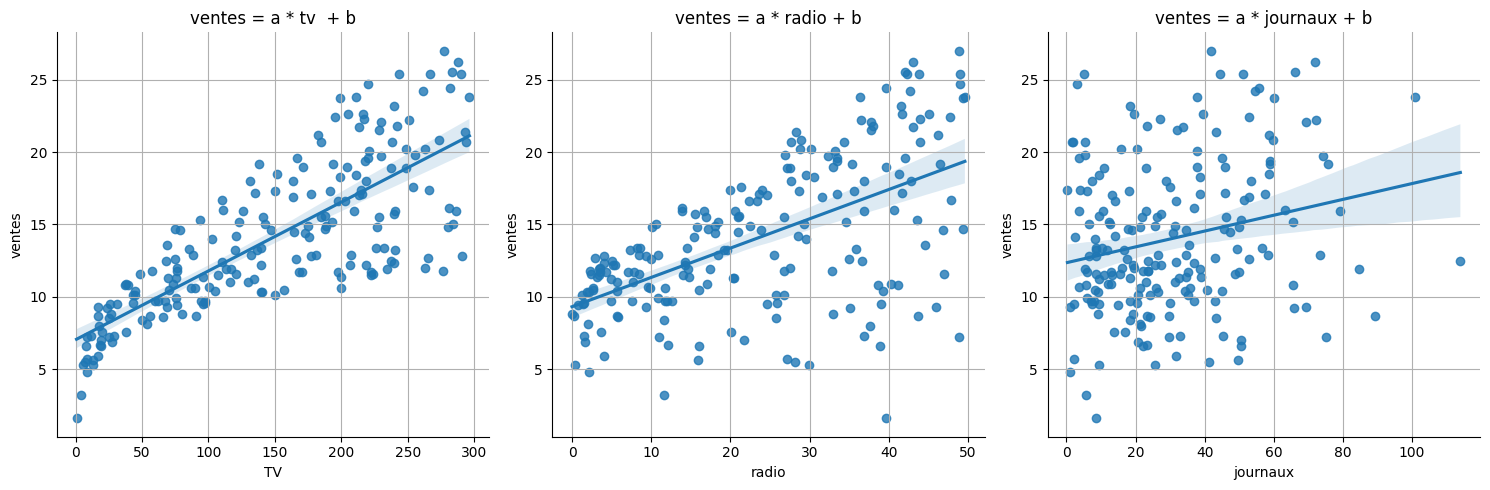

In [6]:
fig, ax = plt.subplots(1,3, figsize = (15,5))

plt.subplot(1,3,1)
sns.regplot(x = df[['tv']],y  =  df.ventes)
plt.ylabel('ventes')
plt.xlabel('TV')
plt.title('ventes = a * tv  + b')
plt.grid()
sns.despine()

plt.subplot(1,3,2)
sns.regplot(x = df[['radio']],y  =  df.ventes)
plt.ylabel('ventes')
plt.xlabel('radio')
plt.title('ventes = a * radio + b')
plt.grid()
sns.despine()

plt.subplot(1,3,3)
res = sns.regplot(x = df[['journaux']],y  =  df.ventes)
plt.ylabel('ventes')
plt.xlabel('journaux')
plt.title('ventes = a * journaux + b')
plt.grid()
sns.despine()

plt.tight_layout()
plt.show()


Le graphe montre que :

- tv est plus prédictive des ventes que radio
- radio est plus prédictive que journaux

L'observation est confirmée par les coefficients de corrélation :


In [7]:
df.corr()

,tv,radio,journaux,ventes
tv,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
journaux,0.056648,0.354104,1.000000,0.228299
ventes,0.782224,0.576223,0.228299,1.000000


### Graphique

<Axes: >

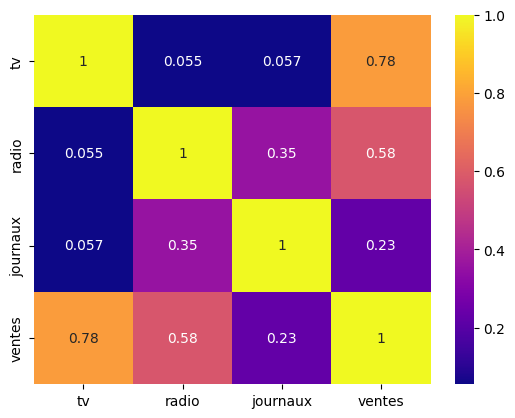

In [8]:
sns.heatmap(df.corr(), annot=True, cmap='plasma')

## Regression linéaire



In [9]:
reg = LinearRegression()

Scindons le dataset en un partie entraînement (80%) et une partie test (20%). On prends 160 échantillons pour entraîner le modèle et on mets 40 échantillons de coté pour l'évaluer.

In [10]:
X = df[['tv','radio','journaux']]
y = df.ventes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
# Entrainons le modele
reg.fit(X_train, y_train)



LinearRegression()

Pour estimer la performance sur le sous-ensemble de test il faut tout d'abord obtenir les prédictions pour X_test:

In [12]:
y_pred_test = reg.predict(X_test)


On peut maintenant calculer l'écart entre les vraies valeurs de test (y_test) et celles prédites par le modèle.

Utilisons la RMSE et la MAPE comme score. Pour ces 2 métriques, un score plus petit correspond à un meilleur modèle.

MAPE est compris entre 0 et 1, tandis que RMSE n'est pas contraint.

Utilisons également le métric r2_score, plus il est petit, plus le modèle est performant




In [13]:
print(f"RMSE: {mean_squared_error(y_test, y_pred_test)}")
print(f"RMSE: {mean_absolute_percentage_error(y_test, y_pred_test)}")
print(f"R2: {r2_score(y_test, y_pred_test)}")


RMSE: 3.1740973539761033
RMSE: 0.15198846602831226
R2: 0.899438024100912


## Ameliorer les performances du modèle

### Terme quadratique
Commençons par ajouter un terme quadratique en `tv^2`.

Pour que les variables aient toutes la même amplitude, ce qui est important pour la regression lineaire, on utilise un _Scaler_ de scikit-learn qui permet de contraindre les valeurs  des variables entre 0 et 1


In [14]:
# Creer la variable quadratique tv^2
df['tv2'] = df.tv**2

variables = ['tv','radio','journaux','tv2']

In [15]:
# Instancier le Scaler
scaler = MinMaxScaler()

# et l'appliquer
data_array = scaler.fit_transform(df[variables])

# transformer le array en dataframe (c'est plus friendly)
df_scaled = pd.DataFrame(data_array,  columns = variables)

# verifier que les min et max des variables sont tous 0 et 1
df_scaled.describe().loc[['min','max']]



,tv,radio,journaux,tv2
min,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0


In [16]:
# scindons les donnees en test et train
X = df_scaled[variables]
y = df.ventes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
# entrainons le modele
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [19]:
# Prediction sur le test set
y_pred_test = reg.predict(X_test)

# Scores
print(f"-- Regression ventes ~ radio + journaux + tv + tv^2")
print(f"\tRMSE: {mean_squared_error(y_test, y_pred_test)}")
print(f"\tMAPE: {mean_absolute_percentage_error(y_test, y_pred_test)}")
print(f"\tR2: {r2_score(y_test, y_pred_test)}")


-- Regression ventes ~ radio + journaux + tv + tv^2
	RMSE: 2.378317089554024
	MAPE: 0.13079146046727738
	R2: 0.9246499904798063


## Nouvelles regressions

Sur le même principe, on va comparer les 3 régressions


- `ventes ~ tv + radio + journaux`
- `ventes ~ tv + radio + journaux + tv^2`
- `ventes ~ tv + radio + journaux + tv * radio`
- `ventes ~ tv + radio + journaux + tv * radio + tv^2 `


In [25]:
# créons la variable tv * radio
df['tv_radio'] = df.tv * df.radio

In [26]:
df

,tv,radio,journaux,ventes,tv2,tv_radio
0,230.1,37.8,69.2,22.1,52946.01,8697.78
1,44.5,39.3,45.1,10.4,1980.25,1748.85
2,17.2,45.9,69.3,9.3,295.84,789.48
3,151.5,41.3,58.5,18.5,22952.25,6256.95
4,180.8,10.8,58.4,12.9,32688.64,1952.64
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,1459.24,141.34
196,94.2,4.9,8.1,9.7,8873.64,461.58
197,177.0,9.3,6.4,12.8,31329.00,1646.10
198,283.6,42.0,66.2,25.5,80428.96,11911.20


In [27]:
regressions = {
    'simple: y ~ tv + radio + journaux'  :     ['tv','radio','journaux'],
    'quadratique: y ~ tv + radio + journaux + tv2': ['tv','radio','journaux', 'tv2'],
    'terme croisée: y ~ tv + radio + journaux + tv*radio':['tv','radio','journaux', 'tv_radio'],
    'terme quadratique_croisée : y ~ tv + radio + journaux + tv*radio + tv^2':['tv','radio','journaux', 'tv2', 'tv_radio']
}

In [30]:
# la varibale cible est toujours la même
y = df.ventes


# boucle sur les régressions
for title, variables in regressions.items():
    # il faut limiter l'amplitude sur toutes les variables predictrices
    scaler = MinMaxScaler()
    data_array = scaler.fit_transform(df[variables])
    # df_scaled = pd.DataFrame(data_array, columns = variables)

    # X = df_scaled[variables]
    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(data_array, y, test_size=0.20, random_state=42)

    # entrainer le modele
    reg.fit(X_train, y_train)
    # Prediction sur le test set
    y_pred_test = reg.predict(X_test)

    # Scores
    print(f"\n-- Regression {title}")
    print(f"\tRMSE: {mean_squared_error(y_test, y_pred_test)}")
    print(f"\tMAPE: {mean_absolute_percentage_error(y_test, y_pred_test)}")
    print(f"\tR2: {r2_score(y_test, y_pred_test)}")






-- Regression simple: y ~ tv + radio + journaux
	RMSE: 3.174097353976106
	MAPE: 0.15198846602831223
	R2: 0.8994380241009119

-- Regression quadratique: y ~ tv + radio + journaux + tv2
	RMSE: 2.3783170895540238
	MAPE: 0.13079146046727738
	R2: 0.9246499904798063

-- Regression terme croisée: y ~ tv + radio + journaux + tv*radio
	RMSE: 0.814430583081221
	MAPE: 0.07328855467044484
	R2: 0.9741971529119298

-- Regression terme quadratique_croisée : y ~ tv + radio + journaux + tv*radio + tv^2
	RMSE: 0.3670544358678825
	MAPE: 0.04797889726017359
	R2: 0.9883709555136483


Le 4ieme modele bat tous les autres !

# Influence du random seed

Le random seed influence =directement les résultats. Pour illustrer ce phénomène, faisons varier le random seeed pour des tailles de test vs train set différents

In [29]:
train_test_ratio = [0.2, 0.4, 0.6, 0.8]

random_seeds = [n for n  in  range(0,200,1)]

In [31]:
# Loop progress
from tqdm import tqdm

# back to simple regression
X = df[['tv','radio','journaux']]
y = df.ventes

scores = []

for ratio in tqdm(train_test_ratio):
    for seed in random_seeds:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=seed)

        reg.fit(X_train, y_train)
        # Prediction sur le test set
        y_pred_test = reg.predict(X_test)

        scores.append({
            'ratio': ratio,
            'seed': seed,
            'rmse': mean_squared_error(y_test, y_pred_test)
        })
scores = pd.DataFrame(scores)

100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


In [32]:
scores.head()

,ratio,seed,rmse
0,0.2,0,4.402118
1,0.2,1,1.991886
2,0.2,2,4.503126
3,0.2,3,2.153782
4,0.2,4,2.217151


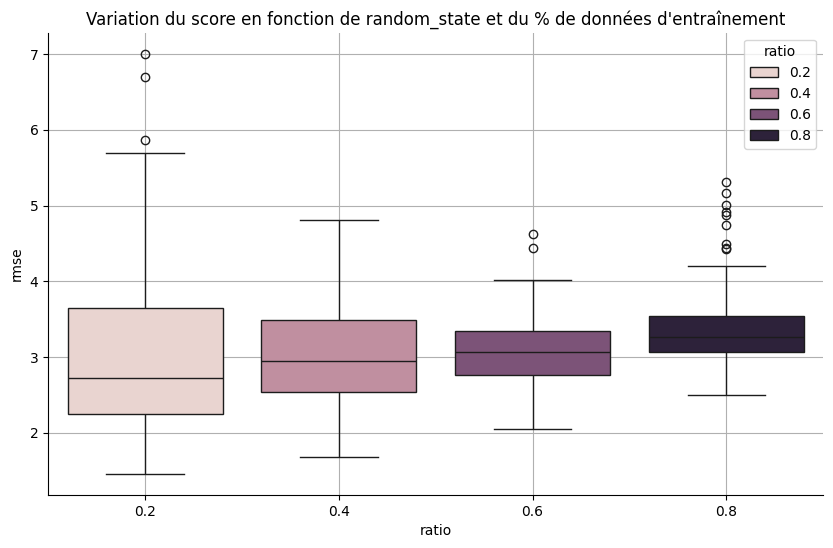

In [33]:
fig = plt.figure(figsize=(10, 6))
sns.boxplot(x = 'ratio', y = 'rmse', hue = 'ratio', data = scores )
sns.despine()
plt.title("Variation du score en fonction de random_state et du % de données d'entraînement")
plt.grid()